<a href="https://colab.research.google.com/github/vibhuverma17/TS_ANALYSIS/blob/main/TS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CHARACTERISTICS OF TS DATA
- Cronological Order: Regular Interval
- Sequential Order: Sequenc of Data (some relation to the past)
- Temporal COmponents
  - Trend
  - Seasonality
  - Cycle
  - Noise
- Constant Frequency: Continuous Data, without any missing values
Dynamic Nature: Many external factors impact the TS data

TS analysis: Statistical techniques to extract meaningful insights regarding trends and patterns
- undestanding past behavious
- forecasting future

Time Series Decomposition/Components
- Trend: Long Term Direction
- Seasonality: Pattern that repeats at fixed intervals
- Cyclical: Pattern but not at fixed intervals
  - Economic Cycle
  - Business Cycle
- Noise/Residuals: Sudden random fluctuation in the data


Types of Decomposition:
What would give us the final results, adding or multiplying TS Components.
- Additive:
- Multiplicative

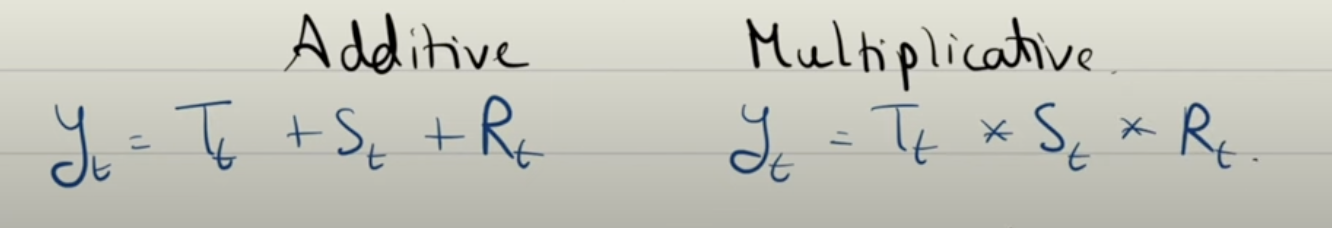

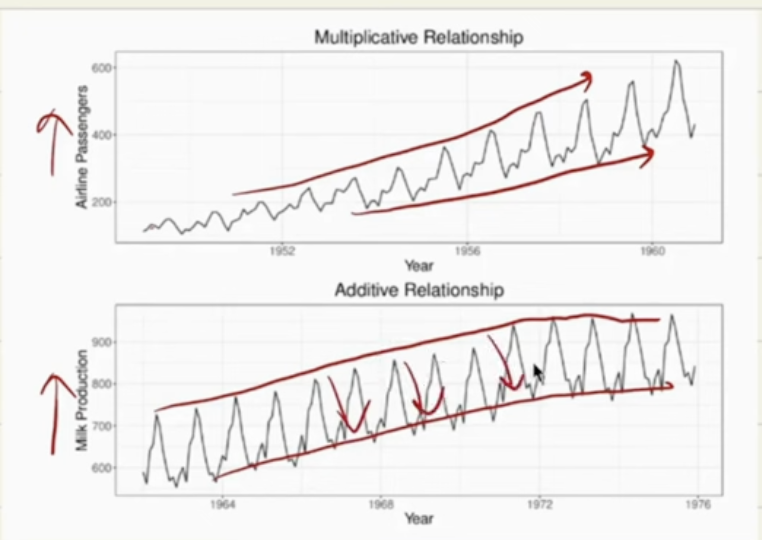

In [54]:
#!pip install yfinance matplotlib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Download Apple stock data starting from 2024
data = yf.download("AAPL", start="2024-01-01")

# Print the first few rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824371  181.997322  179.800520  181.062929  71983600
2024-01-05  180.098679  181.669251  179.094712  180.903857  62303300
2024-01-08  184.452545  184.492315  180.416778  181.003253  59144500

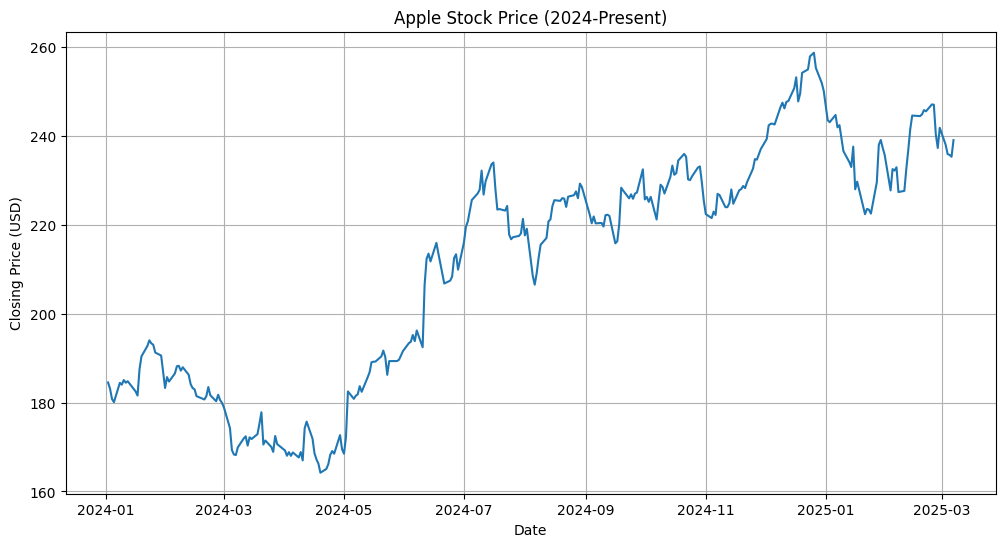

In [55]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Price (2024-Present)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

### CLASSICAL TIME SERIES DECOMPOSITION

- Assumes fixed seasonal patterns in the data
- Easily influenced by outliers
- Can handle both multiplicative and additive models

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(data['Close'], model='additive', period=30) # THIS IS THE PERIOD WE WANT TO USE, 30 = DAILY
# decomposition_multiplicative = seasonal_decompose(data['Close'], model='multiplicative')

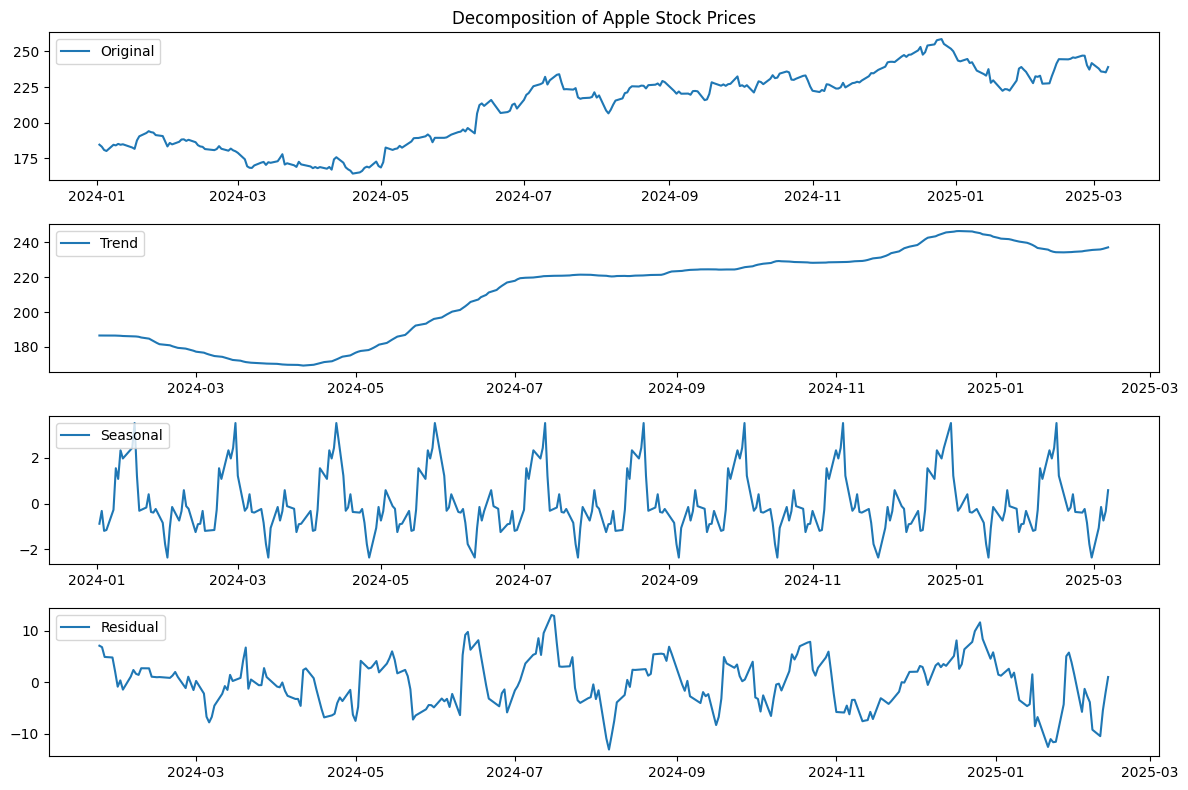

In [57]:
# Plot the original data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Decomposition of Apple Stock Prices')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition_additive.trend, label='Trend')
plt.legend(loc='upper left')


# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition_additive.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition_additive.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STL DECOMPOSITION USING LOESS METHOD
- LOESS = Locally estimated scatterplot smoothing
- Can handle outliers
- Only handle additive TS Data
- Finds actual/variety of seasonal patterns

In [58]:
import numpy as np
from statsmodels.tsa.seasonal import STL

# STL Decomposition
stl = STL(data['Close'], period=30)
res = stl.fit()

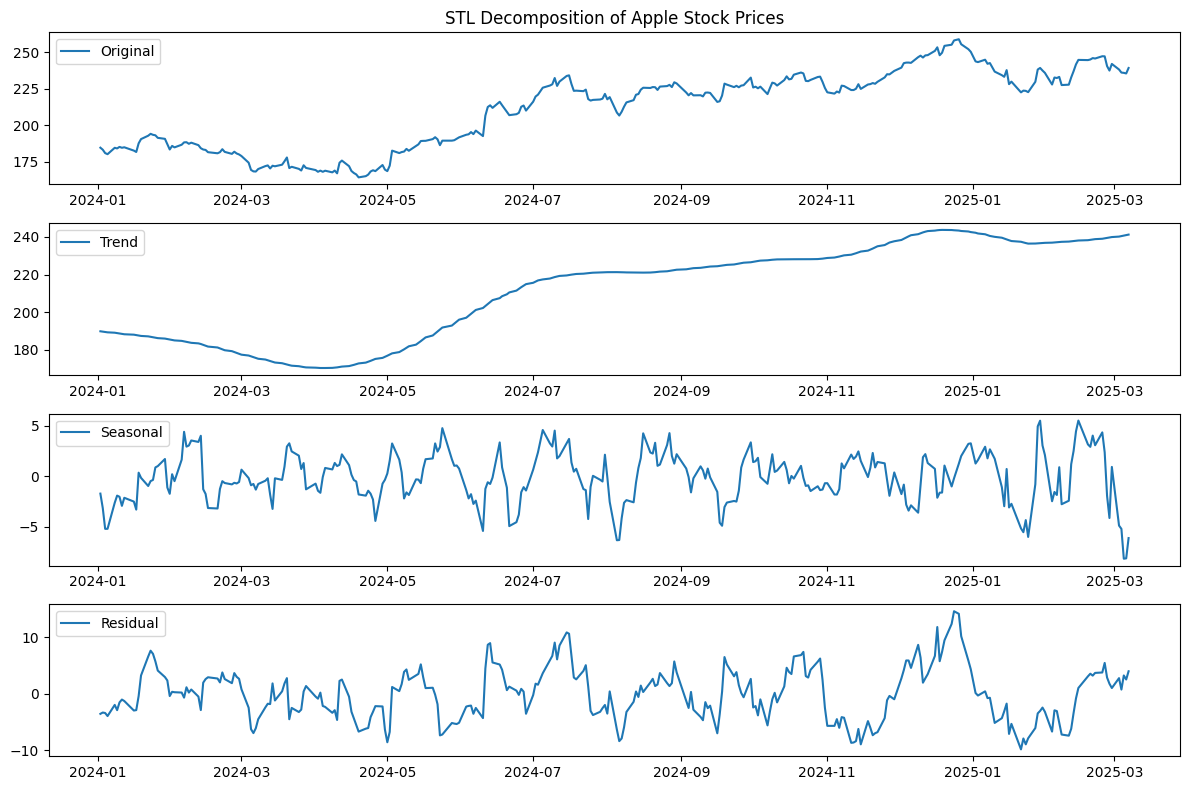

In [59]:
# Plot the STL decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('STL Decomposition of Apple Stock Prices')

plt.subplot(412)
plt.plot(res.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(res.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(res.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STATIONARITY

- mean, variance and autocorelation is constant over time
- autocorelation = corelation of a point at point t with point t-n where n is the lag
- Why do we need stationarity?
  - We are trying to predict statistical properties on future data which should be similar to the past data
- We need this for future forecasting, as we assume same properties throughout the time
- ARIMA/ SARIMA assume requires stationarity

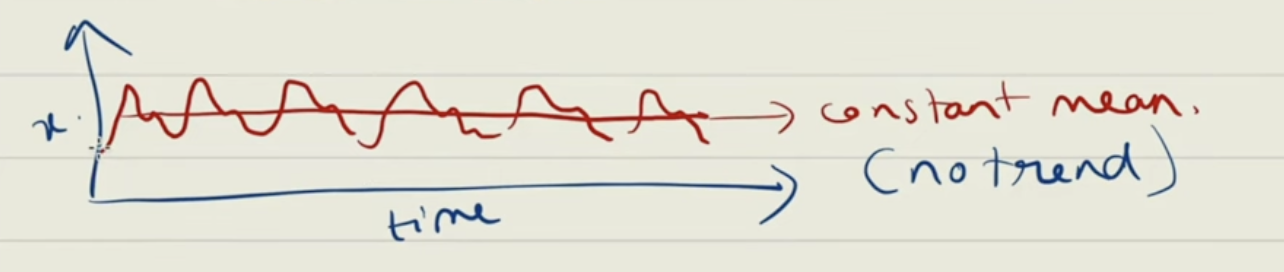

### TYPES OF STATIONARITY

- Weak Stationarity
  - Constant mean, variable and auto correlation

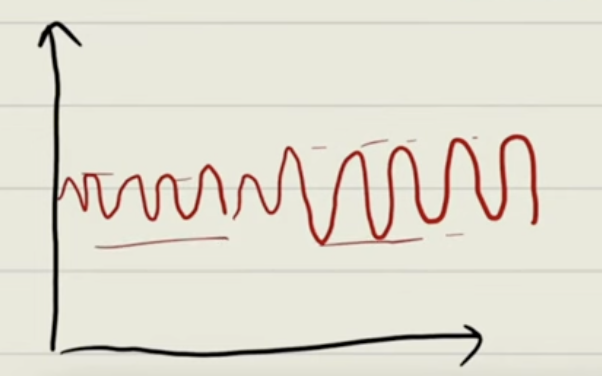

- Strict Stationarity
  - Properties of weak stationarity
  - Joint distribution remains unchanged when shifted along any time period IMPORTANT

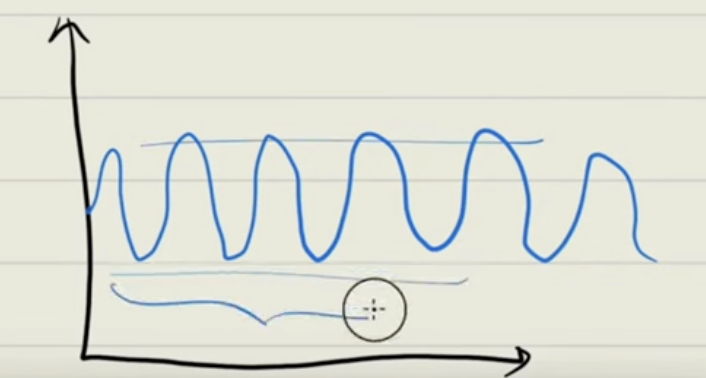

A time series model for which all joint distributions are invariant to shifts in time is called strictly stationary.

Formally, this means that for any collection of times (t1,t2,…,tK)
, the joint distribution of observations at these times should be the same as the joint distribution at (t1+τ,t2+τ,…,tK+τ)
 for any τ
.

For equally spaced observations, this becomes: for any collection of timepoints n1,…,nK
, and for any lag h
, the joint density function of (Yn1,Yn2,…,YnK)
 is the same as the joint density function of (Yn1+h,Yn2+h,…,YnK+h)
.

In our general notation for densities, this strict stationarity requirement can be written as
fYn1,Yn2,…,YnK(y1,y2,…,yK)=fYn1+h,Yn2+h,…,YnK+h(y1,y2,…,yK).

**Strict stationarity implies weak stationarity (check this)**. Note that we only defined weak stationarity for equally spaced observations.


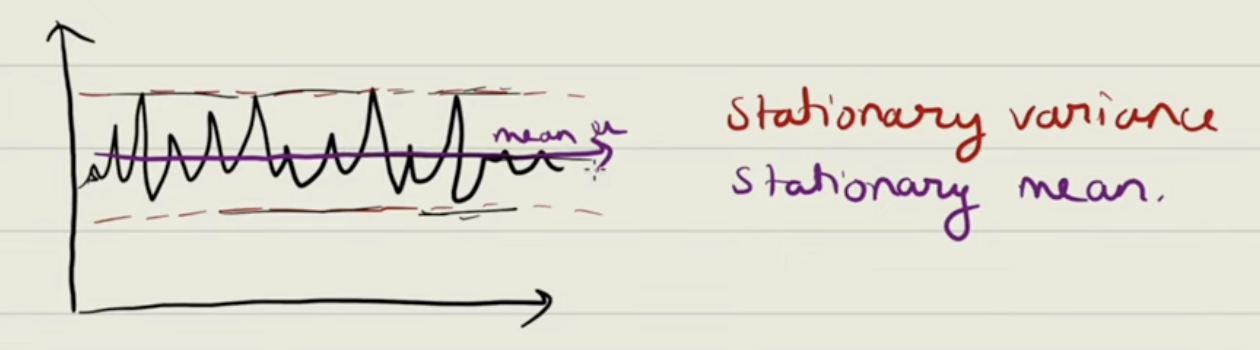

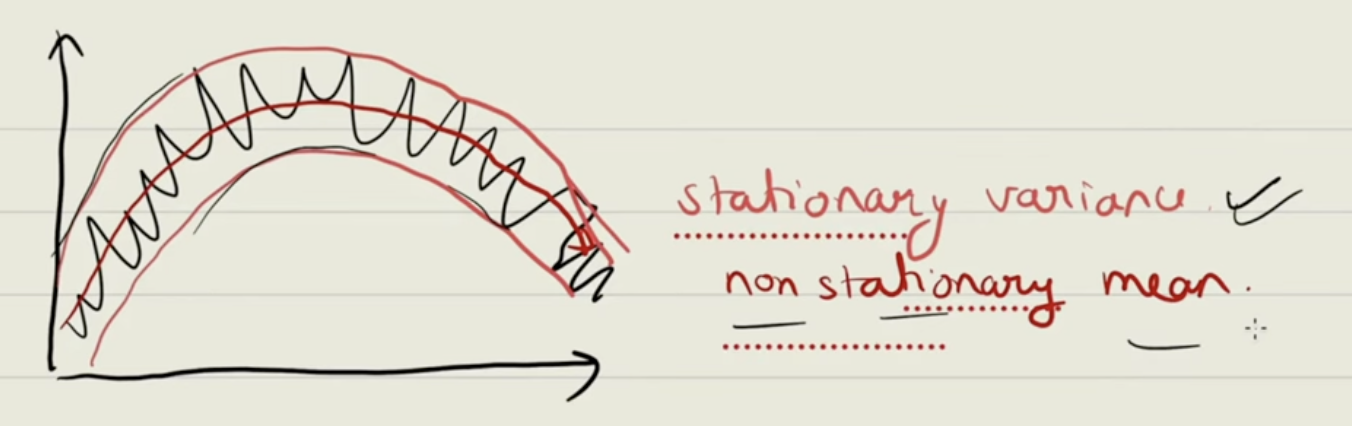

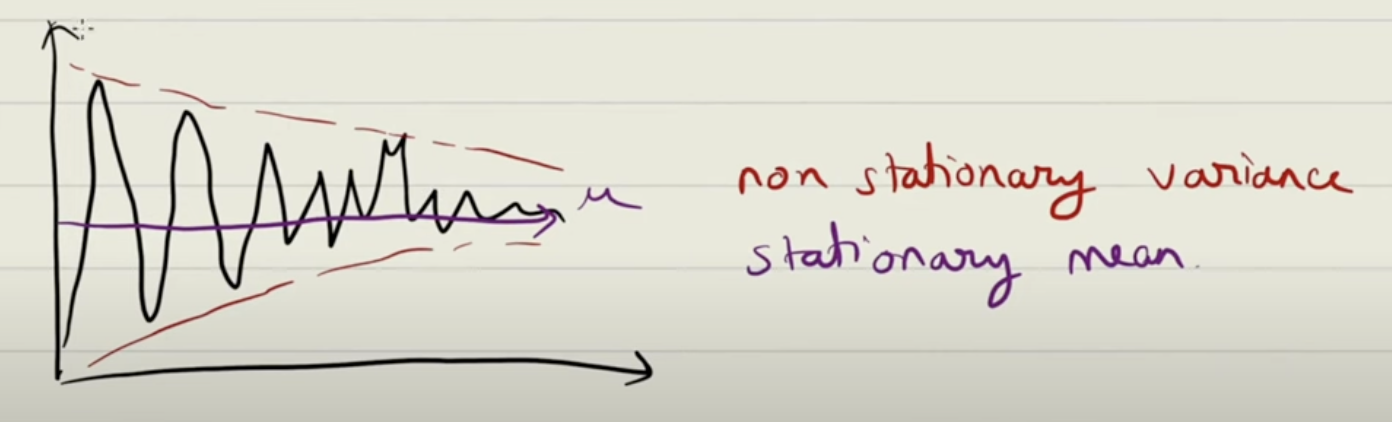

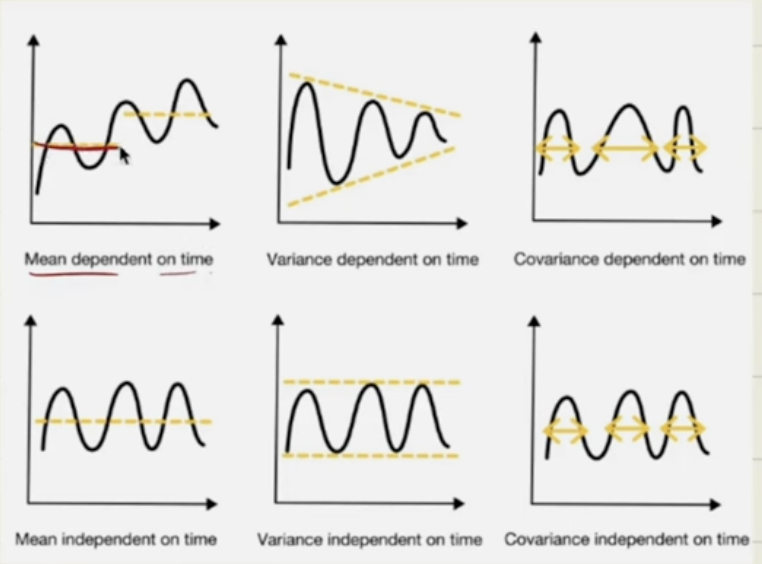

## FORECASTING MODELS AND TS MODELS:

- For forecasting shorter span: Weak Stationarity
- For Modeling longer distribution of data : Strict Stationary


### TESTING FOR STATIONARY
- Weak Stationary Test:
  - ADF Test:
    - If a unit root is present in the data
    - Unit Root: non stationary trend
      - Null hypothesis: Data has a unit root
      - Alternate hypothesis: Stationary Data
    - Decision Criteria: p-value< significance level (0.05) then data is stationary
    - ADF Statistic < Critical Value - Reject Null Value
  - KPSS Test:
    - Fit a constant mean model on the data
    - Measures the variance of cummulative sum of the variance
      - Null Hypothesis: Stationary
      - Alternate Hypothesis - Non Stationary
    - Decision Criteria: p-value < significance (0.05) non-stationary
    - KPSS Statistic > Critical Value then also non stationary


**Good to do both the tests to make sure we have weak stationarity**

- Strict Stationarity: Strict encompasses Weak stationarity
  - KS Test:
    - Compares the cummulative distribution functions of two samples
    - This test checks how similar two distributions are—whether a sample of data fits a specific distribution (like normal distribution) or if two samples are from the same distribution.
    - Decision Criteria: p > significance level 0.05 then there is no difference in distributions i.e., the data is strict stationary



In [60]:
from statsmodels.tsa.stattools import adfuller

try:
    # Perform the ADF test
    data = data['Close']
    result = adfuller(data)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("The data is likely stationary (reject null hypothesis).")
    else:
        print("The data is likely non-stationary (fail to reject null hypothesis).")
except Exception as e:
    print(f"An error occurred: {e}")


ADF Statistic: -0.974228
p-value: 0.762548
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


In [61]:
from statsmodels.tsa.stattools import kpss

try:
    # Perform the KPSS test
    result = kpss(data)

    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] >= 0.05:
        print("The data is likely stationary (fail to reject null hypothesis).")
    else:
        print("The data is likely non-stationary (reject null hypothesis).")

except Exception as e:
    print(f"An error occurred: {e}")

KPSS Statistic: 2.395553
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The data is likely non-stationary (reject null hypothesis).


In [62]:
from scipy.stats import ks_2samp, norm

series = data.values

def ks_test_stationary(series):
  split = len(series)/2
  series1 = series[:int(split)]
  series2 = series[int(split):]
  stat, p_value = ks_2samp(series1, series2)
  return stat, p_value

stat, p_value = ks_test_stationary(series)
alpha = 0.05

print('KS Statistic:', stat)

if p_value > alpha:
    print("The data are likely from the same distribution (fail to reject null hypothesis).")
else:
    print("The data are likely from different distributions (reject null hypothesis).")


KS Statistic: [0.84459459]
The data are likely from different distributions (reject null hypothesis).


### MAKING A TIME SERIES STATIONARY


1. Differencing (Current Value - Past Value)
  - First order Difference y(t') = y (at t) - y (at t-1)
  - Second Order Difference y(t'') = y' (at t) - y' (at t-1)
  - If we have seasonal data we can subtract with the lag that is same as the seasonal gap
2. Transforming : Stablize the variance of TS Data
  - Logrithmic: Log of Data
  - Power: Sqrt(yt)
  - Box-Cox: Combination of power and logrithmic transformation
3. De trending: Removing Trend Component
  - Linear Detrending: Subtracting a Regression value from the TS
  - Moving Average Detrending: Moving Average (MA) detrending is a technique used to remove trends from a time series by subtracting a moving average from the original data. We can have a window size and average values as per the sliding window size
4. Seasonal Adjustment:
  - Removing Seasonal Component: STL and Simple Decomposition



In [63]:
data = yf.download("AAPL", start="2024-01-01")

def adf_test(data, column_name='Close'):
    """
    Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing ADF statistic, p-value, and critical values.
    """
    try:
        # Extract the relevant column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Perform the ADF test
        result = adfuller(data.dropna())  # Drop NaN values to avoid errors

        # Print results
        print(f'ADF Statistic: {result[0]:.6f}')
        print(f'p-value: {result[1]:.6f}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.3f}')

        # Conclusion
        if result[1] <= 0.05:
            print("The data is likely stationary (reject null hypothesis).")
        else:
            print("The data is likely non-stationary (fail to reject null hypothesis).")

        # Return results as a dictionary
        return {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[4],
            'Stationary': result[1] <= 0.05
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def kpss_test(data, column_name='Close'):
    """
    Perform the KPSS test to check for stationarity.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing KPSS statistic, p-value, and critical values.
    """
    try:
        # Extract column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Perform the KPSS test
        result = kpss(data.dropna(), regression='c', nlags="auto")  # 'c' tests for level stationarity

        # Print results
        print(f'KPSS Statistic: {result[0]:.6f}')
        print(f'p-value: {result[1]:.6f}')
        print('Critical Values:')
        for key, value in result[3].items():
            print(f'\t{key}: {value:.3f}')

        # Conclusion
        if result[1] >= 0.05:
            print("The data is likely stationary (fail to reject null hypothesis).")
        else:
            print("The data is likely non-stationary (reject null hypothesis).")

        # Return results as a dictionary
        return {
            'KPSS Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[3],
            'Stationary': result[1] >= 0.05  # Fail to reject null means stationary
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def ks_test_stationary(data, column_name='Close'):
    """
    Perform the Kolmogorov-Smirnov (KS) test to check stationarity by splitting the series into two halves.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing KS statistic and p-value.
    """
    try:
        # Extract column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Convert to numpy array
        series = data.dropna().values

        # Split into two halves
        split = len(series) // 2
        series1, series2 = series[:split], series[split:]

        # Perform KS test
        stat, p_value = ks_2samp(series1, series2)

        # Print results
        print(f'KS Statistic: {stat:.6f}')
        print(f'p-value: {p_value:.6f}')

        # Conclusion
        alpha = 0.05
        if p_value > alpha:
            print("The data are likely from the same distribution (fail to reject null hypothesis).")
        else:
            print("The data are likely from different distributions (reject null hypothesis).")

        # Return results as a dictionary
        return {
            'KS Statistic': stat,
            'p-value': p_value,
            'Same Distribution': p_value > alpha  # Fail to reject null means same distribution
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

[*********************100%***********************]  1 of 1 completed


In [64]:
# Simulated non-stationary time series data
time_series_data = data['Close']

# Run the ADF test
result = adf_test(time_series_data)

# Run KPSS test
kpss_result = kpss_test(time_series_data)

# Run KS test
ks_result = ks_test_stationary(time_series_data)

# Check stationarity results
if result and result['Stationary']:
    print("Time series is stationary.")
else:
    print("Time series is not stationary.")

if kpss_result and kpss_result['Stationary']:
    print("Time series is stationary based on KPSS test.")
else:
    print("Time series is not stationary based on KPSS test.")

if ks_result and ks_result['Same Distribution']:
    print("Time series is likely stationary based on KS test.")
else:
    print("Time series is likely non-stationary based on KS test.")

An error occurred: Column 'Close' not found in DataFrame.
An error occurred: Column 'Close' not found in DataFrame.
An error occurred: Column 'Close' not found in DataFrame.
Time series is not stationary.
Time series is not stationary based on KPSS test.
Time series is likely non-stationary based on KS test.


In [65]:
# DIFFERENCING
# #FIRST ORDER DIFFERENCING
fo_diff_data = data['Close'].diff()
fo_diff_data.columns = ['Close']

# #SECOND ORDER DIFFERENCING
so_diff_data = data['Close'].diff().diff()
so_diff_data.columns = ['Close']

In [66]:
result = adf_test(fo_diff_data)
result = adf_test(so_diff_data)

ADF Statistic: -16.146684
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely stationary (reject null hypothesis).
ADF Statistic: -8.951084
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
The data is likely stationary (reject null hypothesis).


In [67]:
# DATA TRANSFORMING
from scipy import stats
price_log = np.log(data['Close'])
price_log.columns = ['Close']
price_sqrt = np.sqrt(data['Close'])
price_sqrt.columns = ['Close']

# Box Cox Requires all +ve values
price_boxcox, _ = stats.boxcox(data[data['Close']>0]['Close'].values.reshape(-1))

In [68]:
# Run the ADF test
result = adf_test(pd.DataFrame(price_boxcox,columns = ['Close']))
result = adf_test(price_log)
result = adf_test(price_sqrt)

ADF Statistic: -1.024271
p-value: 0.744309
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).
ADF Statistic: -0.951952
p-value: 0.770383
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).
ADF Statistic: -0.961129
p-value: 0.767176
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


#### CONCLUSION:
- Data was stationary after differencing, and not after data transformations, which means we have less variance in our data

### TREND DECOMPOSITION

In [69]:
from scipy import signal

# Ensure 'Close' is a Series
close_series = data['Close'].squeeze()  # Converts a single-column DataFrame to a Series if necessary

# Fit a linear trend, we can also fit a regression model to get the trend line
trend = np.polyfit(np.arange(len(close_series)), close_series, 1)
trendline = np.polyval(trend, np.arange(len(close_series)))

# Subtract trendline
detrended_data = close_series - trendline


detrended_data.columns = ['Close']
result = adf_test(detrended_data)

ADF Statistic: -2.243701
p-value: 0.190768
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


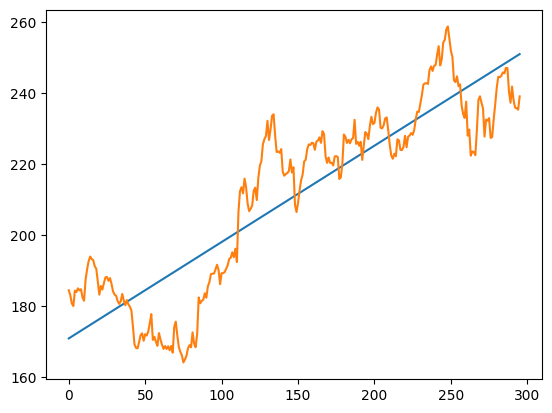

In [70]:
plt.plot(np.arange(len(close_series)),trendline)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### MA DECOMPOSITION

In [71]:
window = 12
prices_ma = close_series.rolling(window=window).mean()
ma_detrended = close_series - prices_ma
ma_detrended.columns = ['Close']
result = adf_test(ma_detrended)

ADF Statistic: -4.864226
p-value: 0.000041
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
The data is likely stationary (reject null hypothesis).


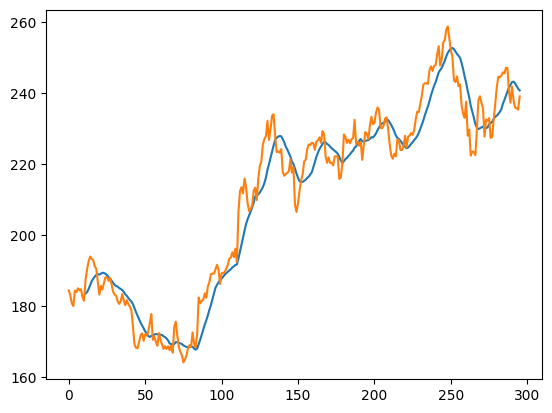

In [72]:
plt.plot(np.arange(len(close_series)),prices_ma)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### SEASONAL DECOMPOSITION

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(close_series, model='multiplicative', period=30)
price_adjusted = close_series / decomposition_additive.seasonal
price_adjusted = price_adjusted.dropna()
result = adf_test(price_adjusted)

ADF Statistic: -0.958286
p-value: 0.768173
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


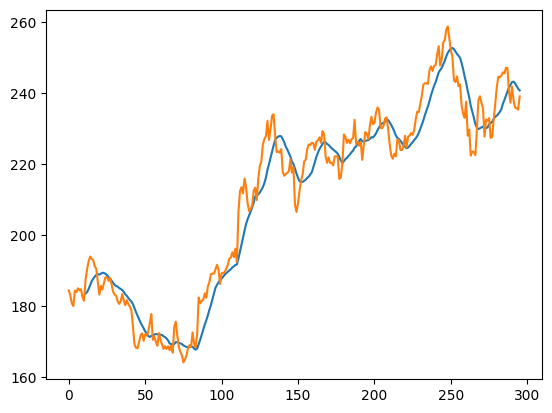

In [74]:
plt.plot(np.arange(len(close_series)),prices_ma)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### WHITE NOISE
- TS Data with no pattern, trend, seasonality
- Constant mean, Constant variance, No Autocorrlation
- Completely random so you do not proceed with any analytics

### RANDOM WALK
- Cummulative pattern (You add past values to get the future value)
y(t) = y(t-1) + e
- This is predictible
- There is a auto correlation
- Mean and Variance Change over time
- This is a non stationary data
- First Difference is stationary
- no predictible Pattern



METHODS TO FIND IF THE DATA IS A WHITE NOISE OR RANDOM WALK
- Visual Representation
- ACF & PACF Plot
- Ljung Box Test

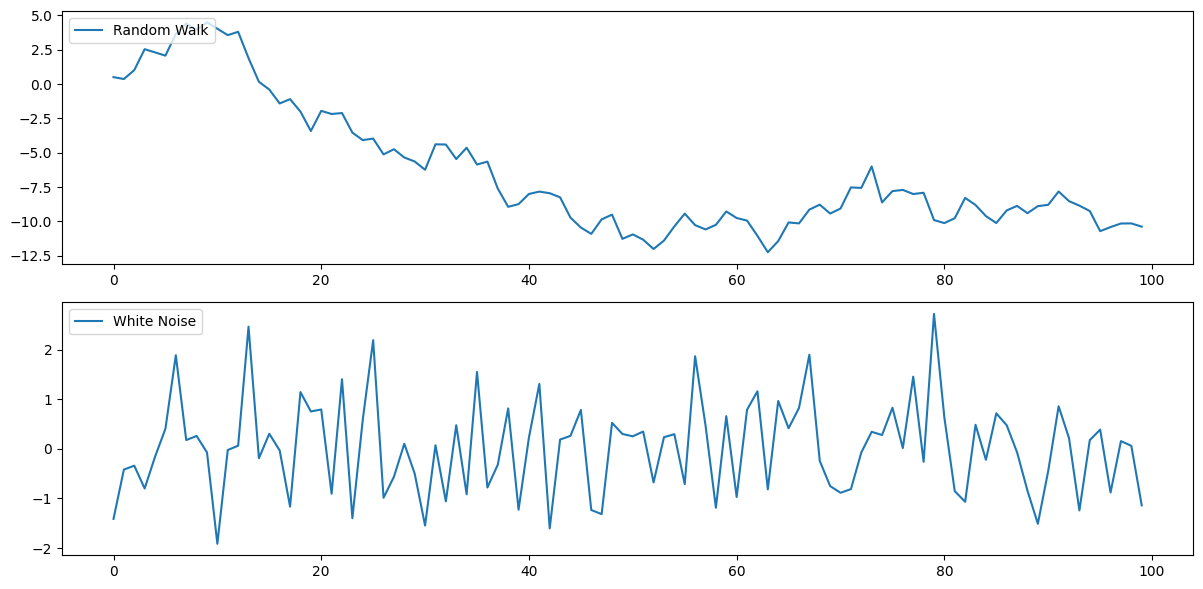

In [75]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random walk data
n_points = 100
random_walk = np.cumsum(np.random.randn(n_points))  # Cumulative sum to create random walk

# Generate white noise data (independent and identically distributed random numbers)
white_noise = np.random.randn(n_points)

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Random Walk': random_walk,
    'White Noise': white_noise
})

# Random Walk Plot
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data['Random Walk'], label='Random Walk')
plt.legend(loc='upper left')

# White Noise Plot
plt.subplot(212)
plt.plot(data['White Noise'], label='White Noise')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [76]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test (default lags = 10)
ljung_box_results = acorr_ljungbox(close_series, lags=[10], return_df=True)

# Display results
print(ljung_box_results)


if ljung_box_results.lb_pvalue.values[0] < 0.05:
    print("The data is likely a random walk.")
else:
    print("The data is likely white noise.")

        lb_stat  lb_pvalue
10  2683.152439        0.0
The data is likely a random walk.


### TIME SERIES FORECASTING MODELS
- All the models assume the data is stationary

#### UNIVARIATE

- AUTO REGRESSIVE (AR)
  - Uses past values to predict future (similar to regression)
  - We have to decide the order (number of past terms used to calcualte the future), this is donated by p
  - AR(p), p lagged observations
  - AR(p) = y(t) = c + ρ1 * y(t-1) + ρ2 * y(t-2) + ..... ρ3 * y(t-p) + e(t)
  - c is the constant term, ρ is the parameter, e = white noise

- MOVING AVERAGE (MA)
   - It uses the past error terms (residuals)
   - Order of moving average model is q, q = # of lag error terms
   - 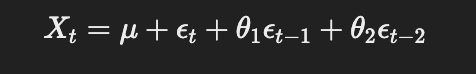
   - 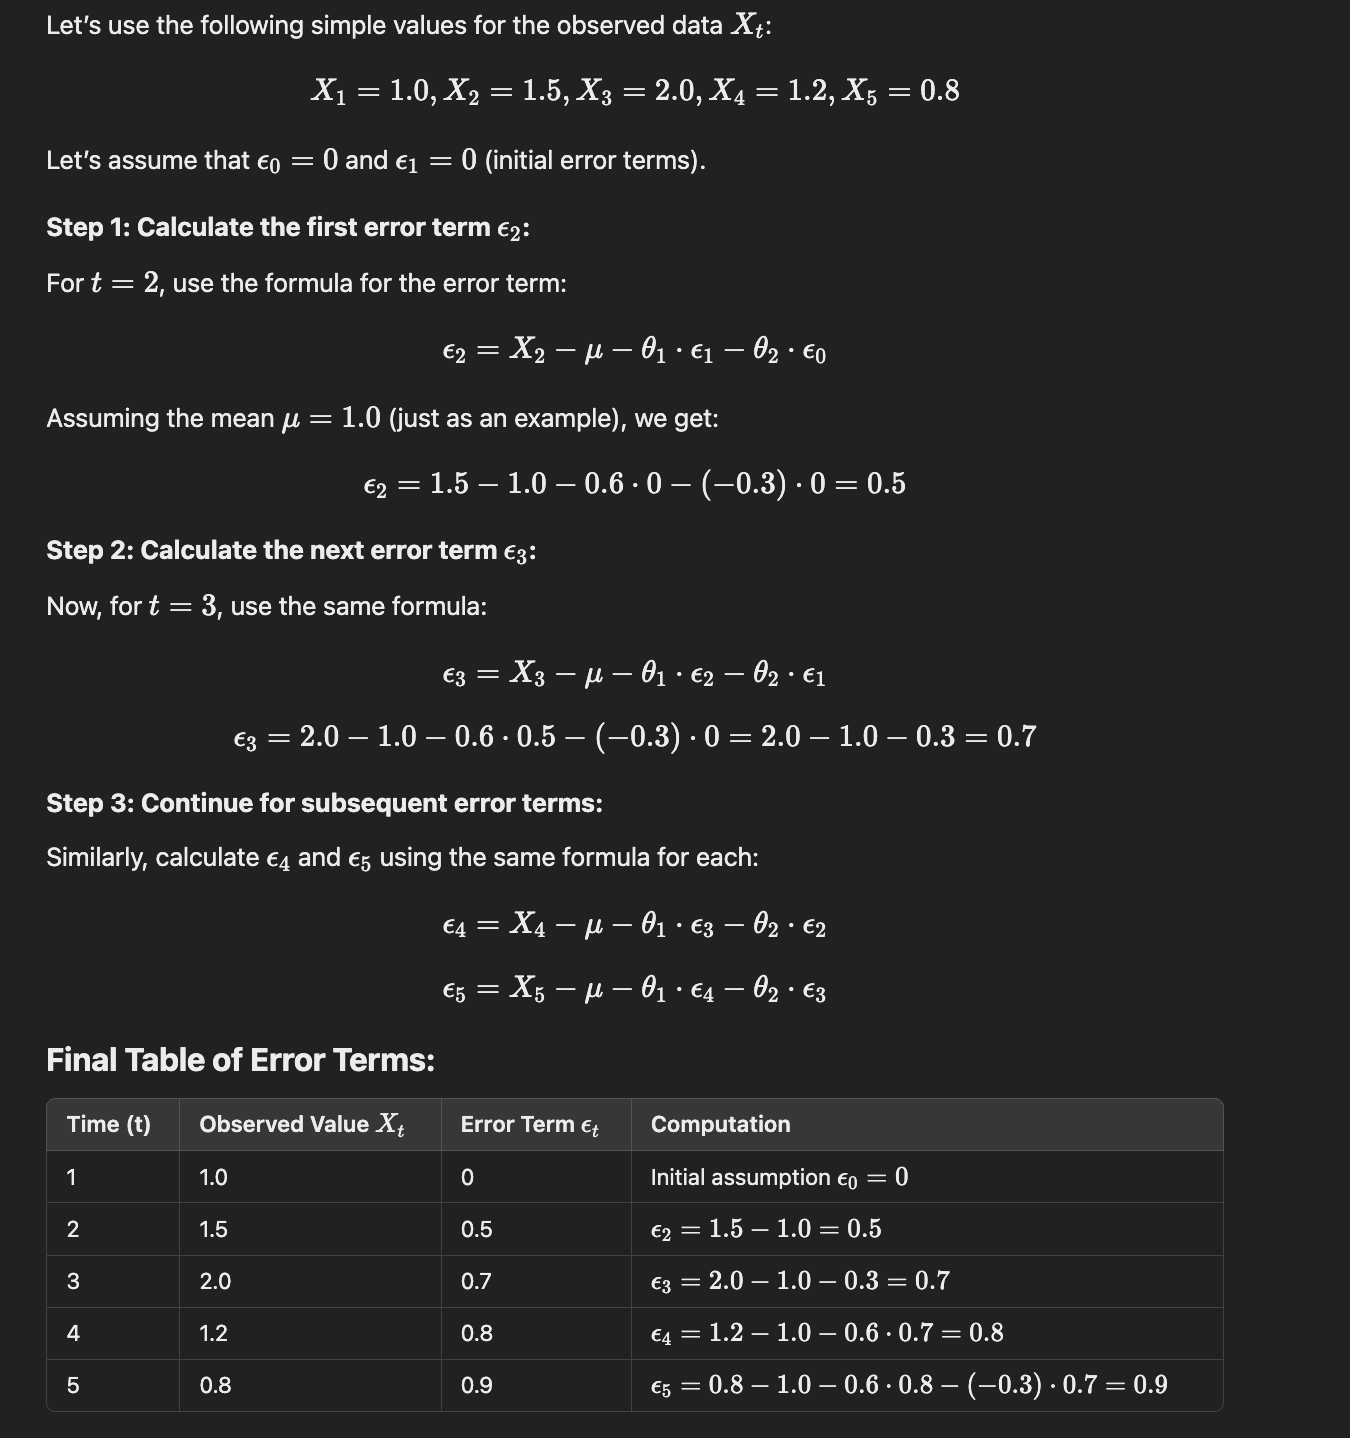

- AUTO REGRESSIVE MOVING AVERAGE (ARMA)
  - Combines the AR and ML Model
  - Captures both temporal dependencies and error terms
  - order (p,q)
  - 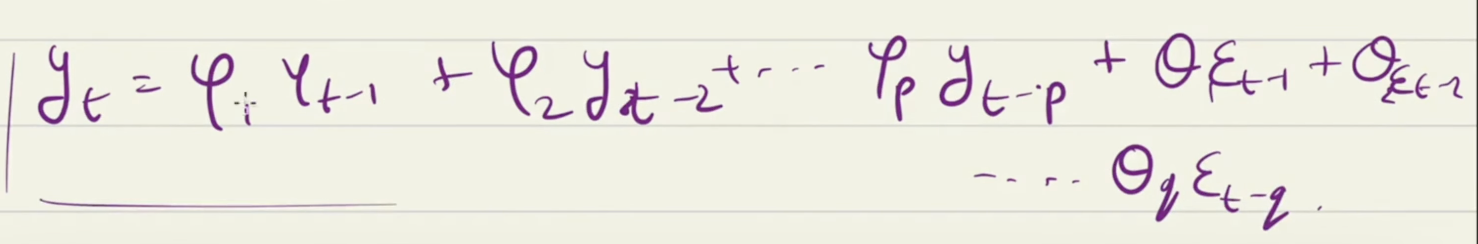
- AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA)
  - I part involves differencing
    - 1st, 2nd, 3rd order difference, we do not go more than 3 as the data loses almost all the signal
    - ARIMA (p,d,q)
    - 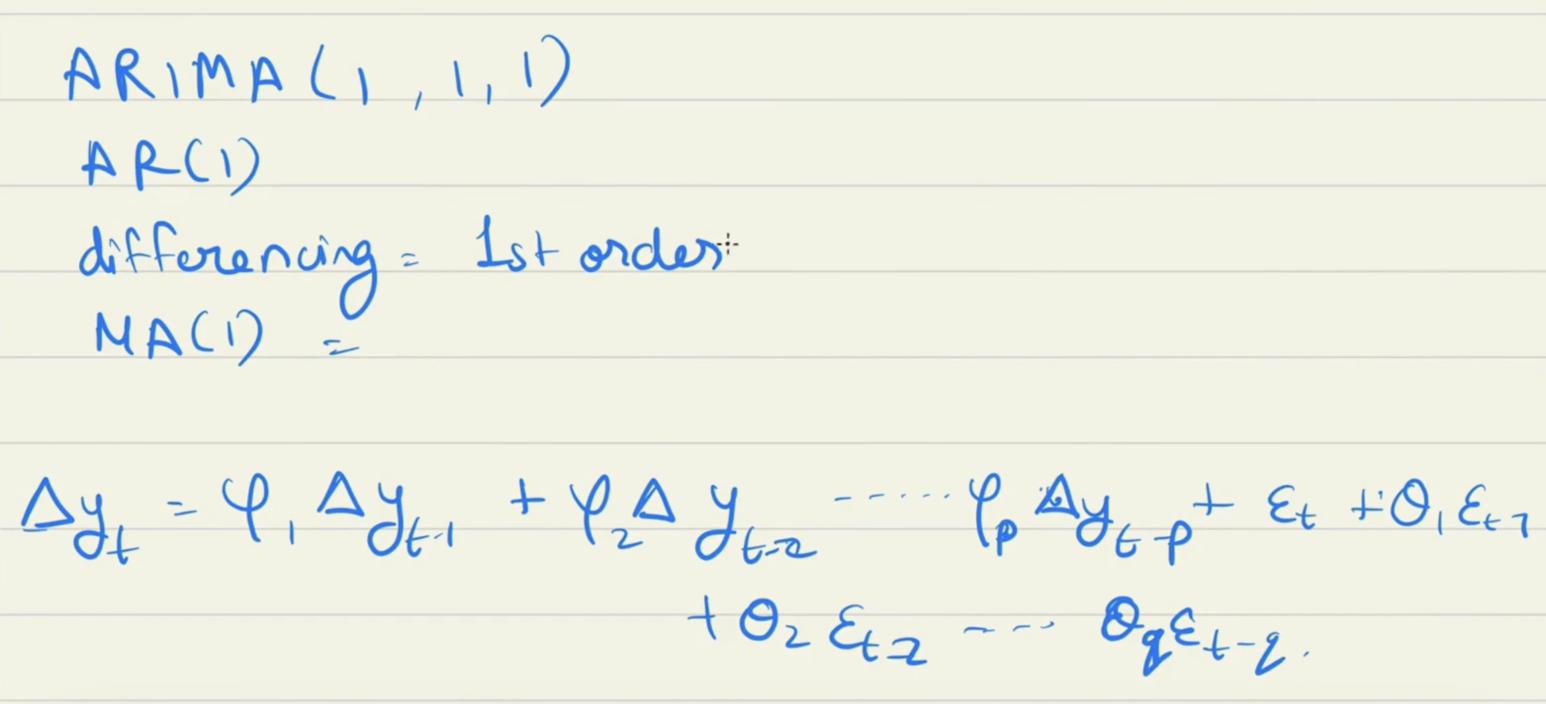
- SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)
   - Seasonal ARIMA Model
   - 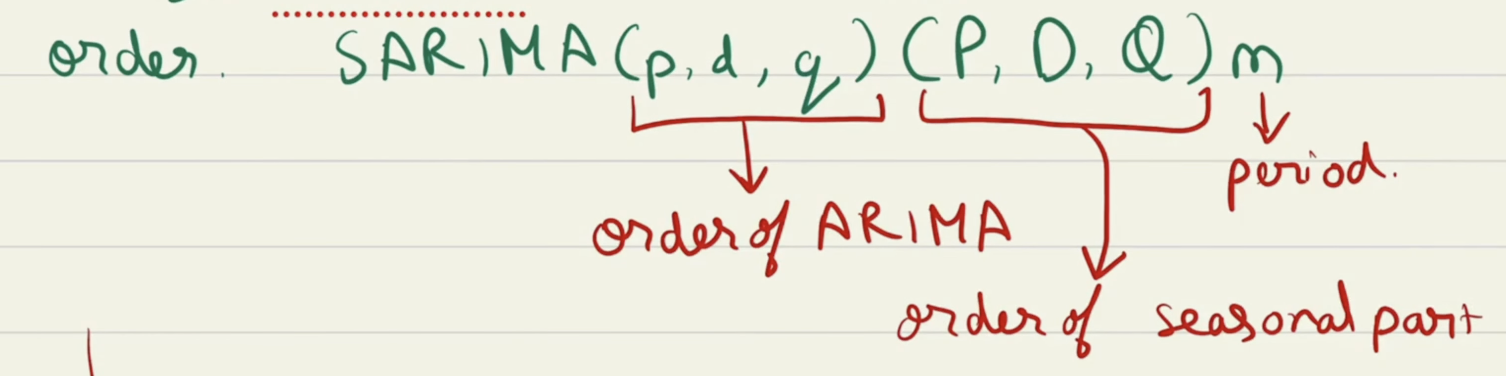
   - for yearly m=3 if data is quarterly, for 3 years m=3 if data is yearly



#### MULTIVARIATE
- This is not just one variable but we have other points which influence the target variable
- These use multiple time series and theor dependencies on each other to predict the final outcome/future values

- VECTOR AUTO REGRESSIVE (VAR)
- VECTOR MOVING AVERAGE (VMA)
- VECTOR AUTOREGRESSIVE MOVING AVERAGE (VARMA)
- VECTOR AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (VARIMA)


Equations are complex - refer text online


GRANGER CAUSALITY TEST:
- If X causes Y or no (One TS can predict another TS)
- This is not correlation


### TO GET THE BEST VALUES OF P,Q and p,q we use ACF and PACF Plots

### AR MODEL

In [77]:
data = yf.download("AAPL", start="2024-01-01")

close_prices = data['Close'].dropna()

[*********************100%***********************]  1 of 1 completed


In [78]:
adf_result = adfuller(close_prices)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is likely non-stationary. Differencing it.")
    close_prices = close_prices.diff().dropna()

adf_result = adfuller(close_prices)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is likely non-stationary. Differencing it.")
    close_prices = close_prices.diff().dropna()
else:
    print("Stationary")

ADF Statistic: -0.9742283245014343
p-value: 0.7625475075494899
The series is likely non-stationary. Differencing it.
ADF Statistic: -16.146688627967656
p-value: 4.615230822978355e-29
Stationary


Mean Squared Error (MSE): 14.0138


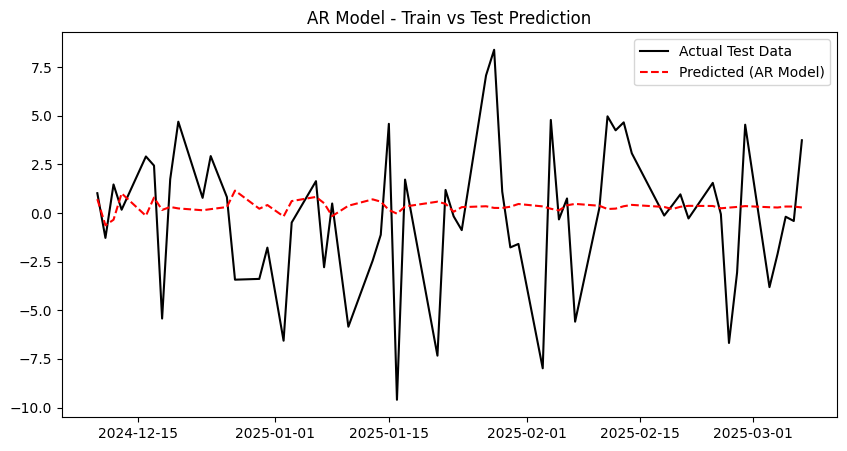

In [79]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

train_data, test_data = close_prices[:int(0.8 * len(close_prices))], close_prices[int(0.8 * len(close_prices)):]

lags = 30  # You can optimize this
ar_model = AutoReg(train_data, lags=lags).fit()

predictions = ar_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 8: Plot Actual vs Predicted Values
plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (AR Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("AR Model - Train vs Test Prediction")
plt.show()

### MA MODEL

Mean Squared Error (MSE): 14.2562


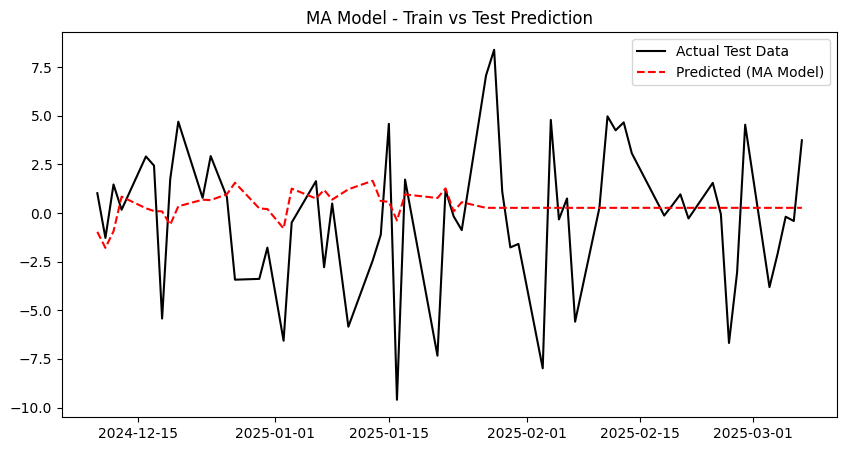

In [80]:
from statsmodels.tsa.arima.model import ARIMA

order = (0,0,30)  # You can optimize this
model = ARIMA(train_data, order=order).fit()

predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (MA Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("MA Model - Train vs Test Prediction")
plt.show()

### ARMA MODEL

Mean Squared Error (MSE): 14.1006


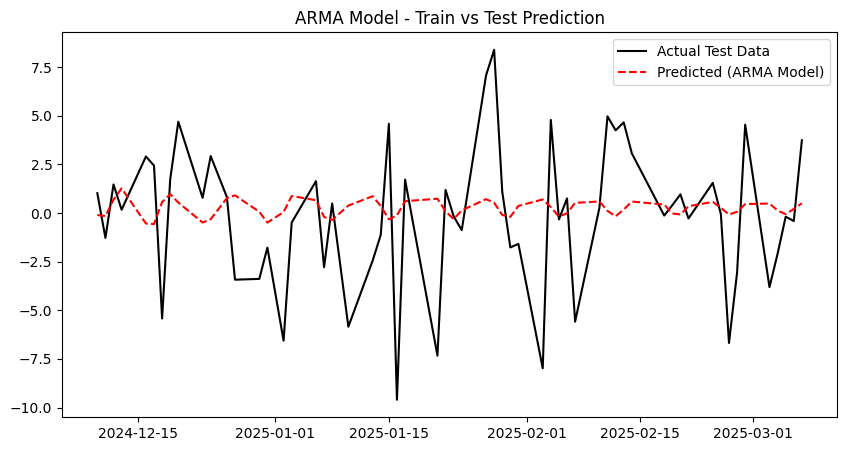

In [81]:
from statsmodels.tsa.arima.model import ARIMA

order = (7,0,7)  # You can optimize this
model = ARIMA(train_data, order=order).fit()

predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (ARMA Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("ARMA Model - Train vs Test Prediction")
plt.show()

### ARIMA MODEL

Mean Squared Error (MSE): 13.7857


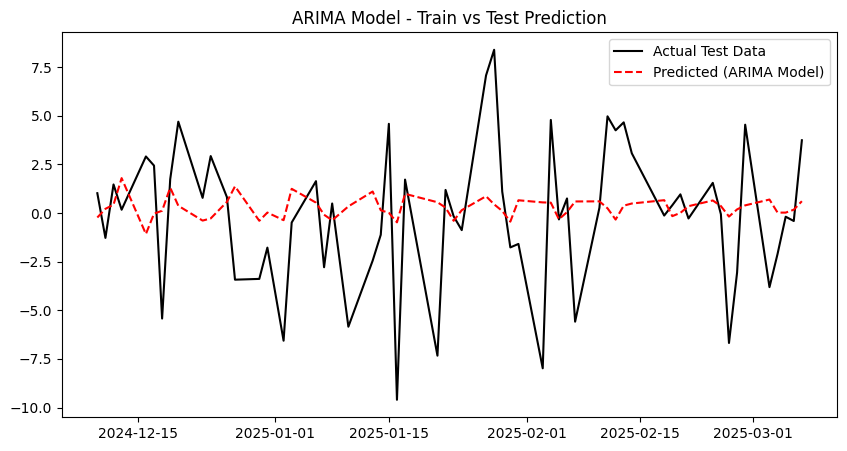

In [82]:
from statsmodels.tsa.arima.model import ARIMA

order = (7,1,7)  # You can optimize this
model = ARIMA(train_data, order=order).fit()

predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (ARIMA Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("ARIMA Model - Train vs Test Prediction")
plt.show()

### SARIMA MODEL

Mean Squared Error (MSE): 13.7857


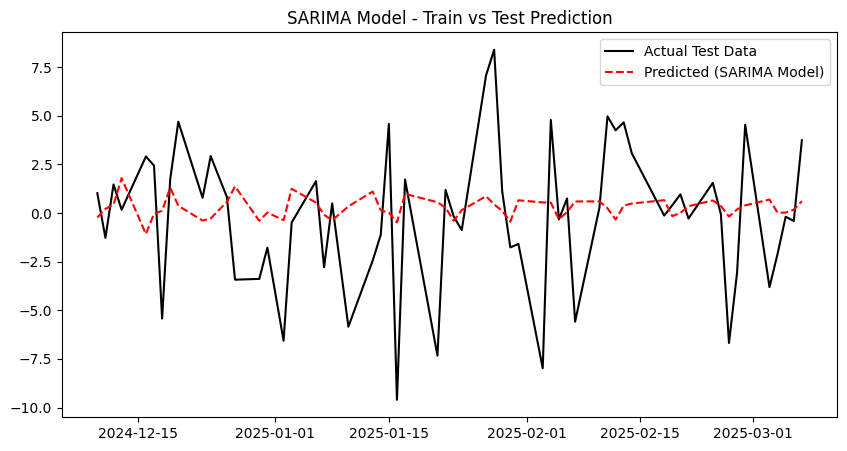

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (7,1,7)  # You can optimize this
seasonal_order = (0,1,1,12)
model = SARIMAX(train_data, order=order).fit()

predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (SARIMA Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("SARIMA Model - Train vs Test Prediction")
plt.show()

### VECTOR MODELS

In [84]:
tsla_data = yf.download('TSLA', start='2024-01-01')
stock_data = yf.download('AAPL', start='2024-01-01')

# if apple previous close can predict tesla stock
stock_data['AAPL_Close'] = stock_data['Close'].shift()
stock_data['TSLA_Close'] = tsla_data['Close']
stock_data.dropna(inplace=True)


from statsmodels.tsa.stattools import grangercausalitytests
# perform Granger-Causality test
grangercausalitytests(stock_data[['AAPL_Close','TSLA_Close']].dropna(),maxlag=[14])

## BASED ON THE p - VALUE WE CAN TELL THAT THE APPLE PRICE IMPACTS THE TESLA STOCK

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=2.6644  , p=0.0012  , df_denom=252, df_num=14
ssr based chi2 test:   chi2=41.5949 , p=0.0001  , df=14
likelihood ratio test: chi2=38.7900 , p=0.0004  , df=14
parameter F test:         F=2.6644  , p=0.0012  , df_denom=252, df_num=14


{14: ({'ssr_ftest': (2.6644415877221794, 0.0011968562821667343, 252.0, 14),
   'ssr_chi2test': (41.59489367499624, 0.00014331148935082201, 14),
   'lrtest': (38.78998958837701, 0.00039299370637299136, 14),
   'params_ftest': (2.6644415877222043, 0.0011968562821666098, 252.0, 14.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0.

In [85]:
data = stock_data[['AAPL_Close','TSLA_Close']].diff().dropna()
train_data, test_data = data[:int(0.91 * len(data))], data[int(0.91 * len(data)):]

### VAR MODEL

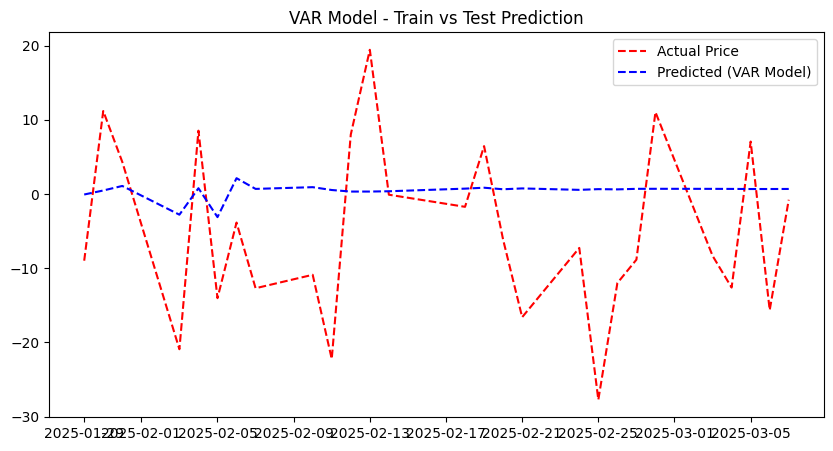

Mean Squared Error (MSE): 13.4600


In [86]:
from statsmodels.tsa.api import VAR

# VAR
model = VAR(train_data)
model_fit = model.fit(maxlags=7)

# Generate forecasts
predictions = model_fit.forecast(train_data.values, steps=len(test_data))
# Convert predictions into a DataFrame with appropriate column names
predictions_df = pd.DataFrame(predictions, index=test_data.index, columns=train_data.columns)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['TSLA_Close'], label="Actual Price", linestyle="dashed", color='red')
plt.plot(test_data.index, predictions_df['TSLA_Close'], label="Predicted (VAR Model)", linestyle="dashed", color='blue')
plt.legend()
plt.title("VAR Model - Train vs Test Prediction")
plt.show()

mse = mean_squared_error(test_data['AAPL_Close'], predictions_df['AAPL_Close'])
print(f"Mean Squared Error (MSE): {mse:.4f}")

### VMA MODEL

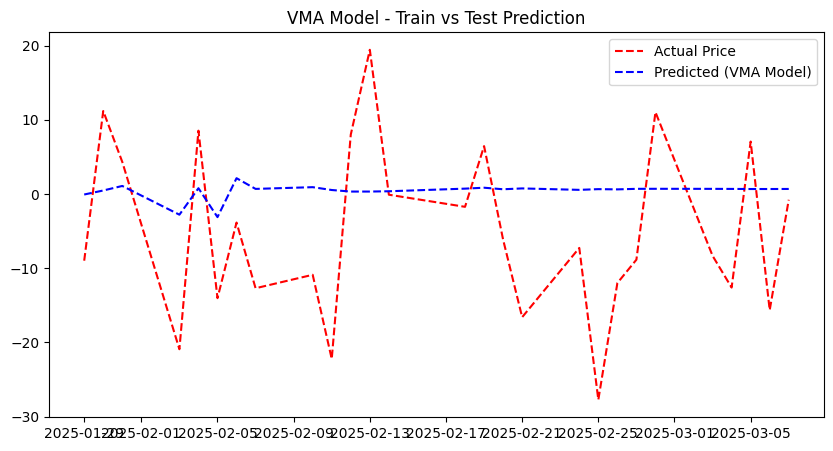

Mean Squared Error (MSE): 13.4600


In [87]:
from statsmodels.tsa.api import VARMAX

model = VARMAX(train_data, order=(0,7))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1,dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['TSLA_Close'], label="Actual Price", linestyle="dashed", color='red')
plt.plot(test_data.index, predictions_df['TSLA_Close'], label="Predicted (VMA Model)", linestyle="dashed", color='blue')
plt.legend()
plt.title("VMA Model - Train vs Test Prediction")
plt.show()

mse = mean_squared_error(test_data['AAPL_Close'], predictions_df['AAPL_Close'])
print(f"Mean Squared Error (MSE): {mse:.4f}")

### VARIMA MODEL

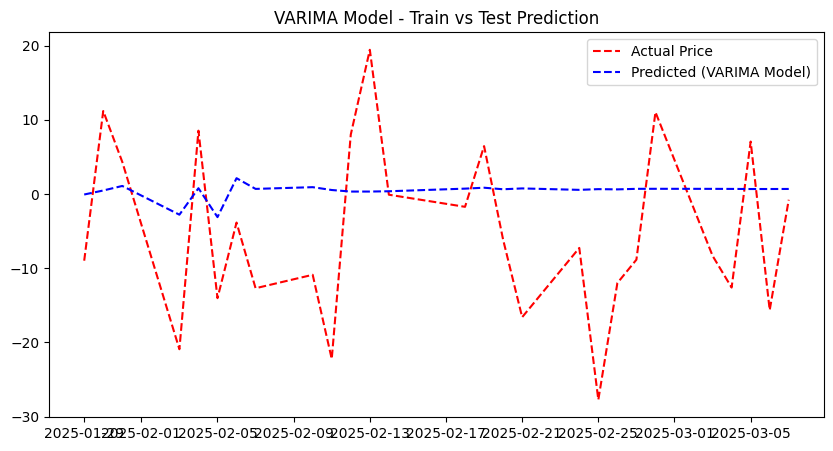

Mean Squared Error (MSE): 13.4600


In [88]:
from statsmodels.tsa.api import VARMAX

model = VARMAX(train_data, order=(14,14))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1,dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['TSLA_Close'], label="Actual Price", linestyle="dashed", color='red')
plt.plot(test_data.index, predictions_df['TSLA_Close'], label="Predicted (VARIMA Model)", linestyle="dashed", color='blue')
plt.legend()
plt.title("VARIMA Model - Train vs Test Prediction")
plt.show()

mse = mean_squared_error(test_data['AAPL_Close'], predictions_df['AAPL_Close'])
print(f"Mean Squared Error (MSE): {mse:.4f}")

### SMOOTHING METHODS

- Importance of Smoothing
  - Noise Reduction
  - Reduced noise in the model results in better models for forcasting
  Also for trend identification
- Moving Average
  - Window Size = n = 3, mean of last 3 values
  - 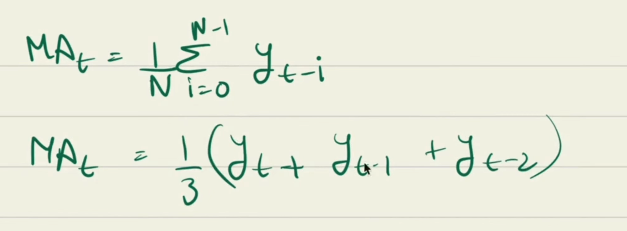
  - Types of Moving Average:
    - Simple Moving Average
    - Weighted Moving Average
      - Recent values get more weight
    - Exponential Moving Average
      - Weights decrease Exponentially
      - 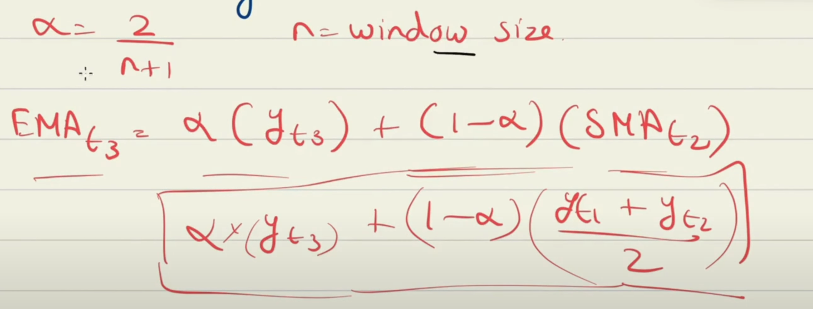
      - High value of alpha means more immportance to recent values
      - alpha depends on the window size
- Exponential Smoothing
  - alpha is user defined, value btween 0 and 1, high value means more weight to recent observations
  - There are 3 types of exponential Smoothing:
    - Single ES - Suitable for data with no trend and seasonality
    - Double ES - Holt's Linear - When data has has trend
    - Triple ES - Holt's Winter - Data with trend and seasonality


### SMOOTHING METHODS

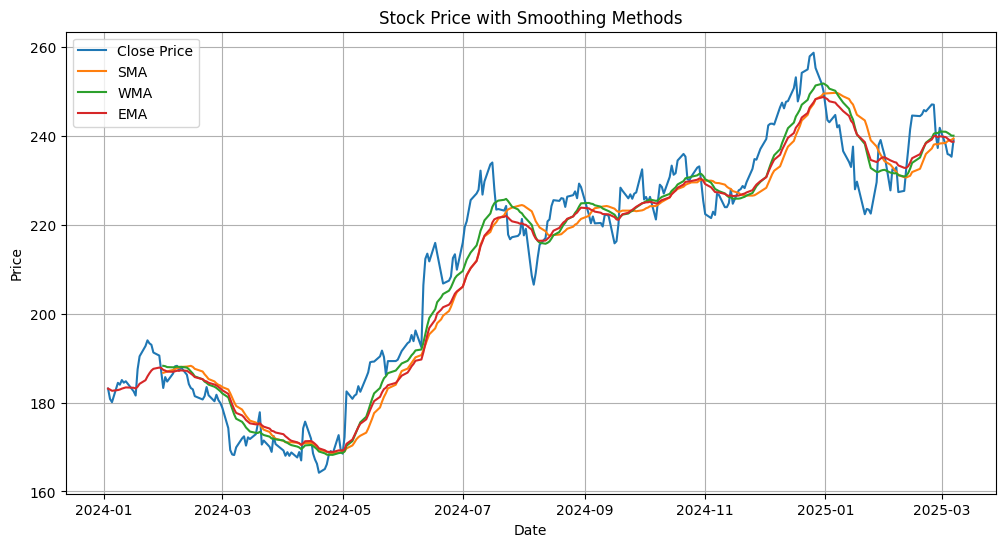

In [89]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()


# calculate Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# calculate the exponential moving average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size, adjust=False).mean()

#plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA'], label='SMA')
plt.plot(stock_data['WMA'], label='WMA')
plt.plot(stock_data['EMA'], label='EMA')
plt.title('Stock Price with Smoothing Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

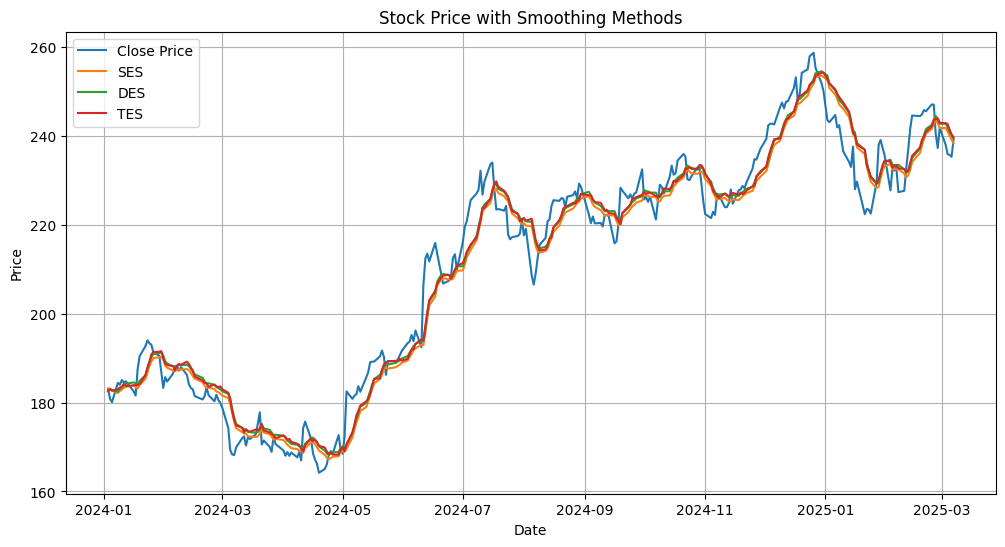

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

close_prices = stock_data['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.2)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) - Holt's inear trend Model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.2)
stock_data['DES'] = des_model.fittedvalues

# Tripe Exponential Smoothing (DES) - Holt's inear trend Model
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.2)
stock_data['TES'] = tes_model.fittedvalues

# plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SES'], label='SES')
plt.plot(stock_data['DES'], label='DES')
plt.plot(stock_data['TES'], label='TES')

plt.title('Stock Price with Smoothing Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

As the value of alpha reduces the smoother the graph gets - takes into account more of the historical value

### Autocorrelation Function (ACF)

The **Autocorrelation Function (ACF)** measures the correlation between a time series and its **lagged values**. Essentially, it tells you how much the past values of the series influence the current value. The ACF helps identify patterns or relationships in the time series data at different lags (i.e., previous time periods).

#### Key Points about ACF:
- **ACF at lag 1** shows how much the current value is related to the previous value.
- **ACF at lag 2** shows how much the current value is related to the value from two periods ago.
- ACF values can range from -1 to 1:
  - A value close to 1 means there’s a strong positive relationship.
  - A value close to -1 means there’s a strong negative relationship.
  - A value close to 0 means no linear relationship.
- The **ACF plot** typically shows the correlation at various lags, helping us understand if there’s any repeating pattern or trend in the data.

#### Use of ACF:
- The ACF helps in identifying the presence of a **moving average (MA) process** in a time series, where current values depend on previous random shocks or errors.
- It’s also used to determine the **ARMA (AutoRegressive Moving Average)** model structure when modeling time series data.

---

### Partial Autocorrelation Function (PACF)

The **Partial Autocorrelation Function (PACF)** is similar to the ACF but with a key difference: it measures the **direct relationship** between the series and its lagged values after removing the influence of all the intermediate lags.

#### Key Points about PACF:
- PACF tells us the direct correlation between the current value and a value from \( k \) periods ago, without any interference from the values in between.
- **PACF at lag 1** is the same as the ACF at lag 1, because there's no intermediate lag to account for.
- **PACF at higher lags** gives the correlation between the current value and a value from that lag, controlling for all previous lags.

#### Use of PACF:
- The PACF is primarily used to identify the order of an **AutoRegressive (AR) model**.
  - If the PACF cuts off sharply after a certain lag, this suggests an AR model of that order.
  - It helps distinguish whether the series is best modeled by an AR process or an MA process.
- It’s also used to fine-tune the number of lags to include in AR models.

---

### Key Differences:
- **ACF** tells you the total correlation at each lag, considering both direct and indirect influences from past values.
- **PACF** isolates the **direct** correlation at each lag by removing the effects of intermediate lags.

### Summary:
- **ACF**: Looks at the overall correlation at each lag.
- **PACF**: Looks at the direct correlation, removing the effects of earlier lags.

---

Together, ACF and PACF provide complementary insights for time series analysis, helping you determine the right model to use (e.g., AR, MA, or ARMA) based on the structure of the data.

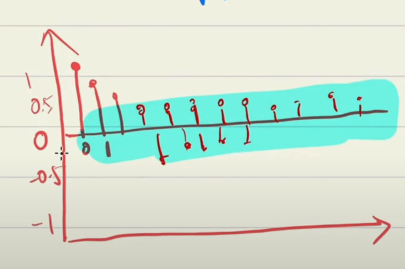

Values below that band are not significant

### Stationarity Detection Using ACF and PACF

| **Pattern in ACF and PACF**                                  | **Stationarity**                | **Explanation**                                                   |
|--------------------------------------------------------------|---------------------------------|-------------------------------------------------------------------|
| **ACF decays quickly**<br>**PACF cuts off sharply after a few lags** | Stationary                      | **Stationary** data will have a quickly decaying ACF and a sharp cutoff in the PACF after a few lags. |
| **ACF remains significantly high at many lags**<br>**PACF decays slowly or doesn't cut off** | Non-Stationary (Trend)          | **Non-stationary** data with a trend will show slow decay in ACF and a slow decay in PACF. This indicates a long-term dependence. |
| **ACF shows a gradual decay or stays high for many lags**<br>**PACF shows no cutoff or slow decay** | Non-Stationary (Seasonality)    | **Seasonal non-stationarity**: The ACF will show repeating patterns or slow decay due to seasonality, and PACF may show a similar behavior. |
| **ACF and PACF behave like stationary data after differencing** | Stationary after Differencing   | After **differencing** (subtracting previous value), ACF should decay quickly, and PACF should cut off sharply, making the series stationary. |

---

### How to Interpret:
- **Stationary Data**:
  - **ACF**: The autocorrelation decays quickly (drops close to zero after a few lags).
  - **PACF**: The partial autocorrelation cuts off sharply after a few lags, indicating no long-term dependence.
  
- **Non-Stationary Data**:
  - **ACF**: For data with a **trend**, the ACF decays slowly or stays high, indicating a long-term dependence (no quick drop).
  - **PACF**: If there’s no sharp cutoff, or it decays slowly, it suggests a non-stationary pattern due to a trend or seasonality.

After differencing a non-stationary series, the ACF should decay quickly, and the PACF should show a sharp cutoff, indicating stationarity has been achieved.



### Model Order Selection Guide for AR, MA, and ARIMA

| **Pattern in ACF and PACF**                                   | **Model Type**                | **Order Determination**                                        |
|---------------------------------------------------------------|-------------------------------|---------------------------------------------------------------|
| **ACF cuts off sharply after lag p**<br>**PACF tails off**     | AR (AutoRegressive)            | **p** is the order of the AR model (look at the last significant PACF spike). |
| **ACF tails off**<br>**PACF cuts off sharply after lag q**     | MA (Moving Average)            | **q** is the order of the MA model (look at the last significant ACF spike). |
| **ACF and PACF both tail off**                                | ARMA (AutoRegressive Moving Average) | **p** and **q** are determined by the ACF and PACF plots (select orders based on significant lags). |
| **ACF cuts off after lag q**<br>**PACF cuts off after lag p**   | ARIMA (AutoRegressive Integrated Moving Average) | **p**, **d**, and **q** where **d** is determined by the number of differencing required to make the series stationary. |
| **ACF and PACF both show sharp cutoffs**                       | AR or MA (Depending on context) | Choose either AR or MA model based on which cutoff is clearer. |


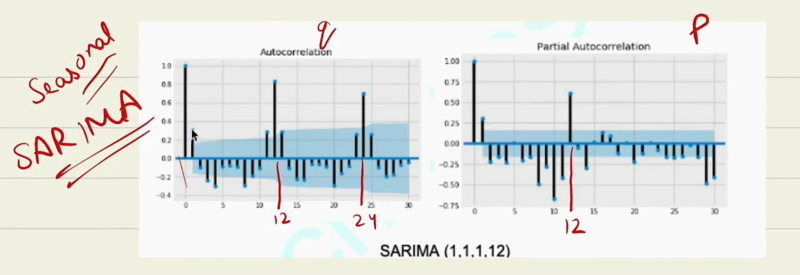


SARIMA(1,1,1)(1,1,1,12)


In a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model, D represents the seasonal differencing order. Seasonal differencing is a technique used to make a time series stationary by subtracting the value from the previous season (for example, the same month or quarter in the previous year).

The purpose of seasonal differencing is to remove any seasonal patterns in the data. The order of seasonal differencing, denoted as D, refers to how many times this differencing is applied to make the time series stationary in a seasonal context.

For example:

D = 1 means taking the difference between the current value and the value from the same period in the previous season (e.g., last year).
D = 2 means differencing twice, each time comparing the current value with the value from two seasons prior.
The SARIMA model is represented as ARIMA(p, d, q)(P, D, Q, s):

p, d, q are the non-seasonal parameters (autoregressive, differencing, and moving average orders).
P, D, Q are the seasonal parameters (seasonal autoregressive, seasonal differencing, and seasonal moving average orders).
s is the length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).

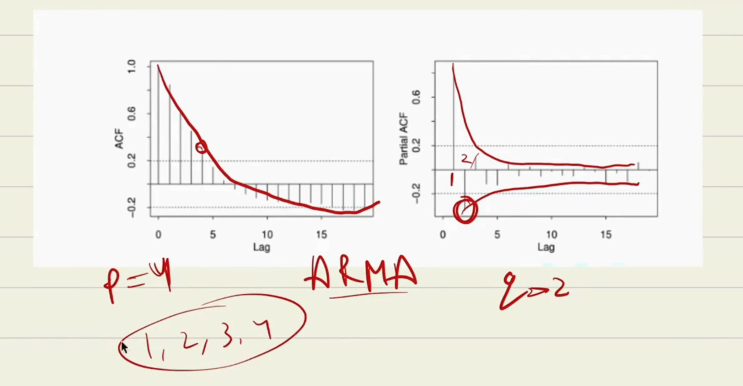

### EVALUATION METRICS

## Model Evaluation Metrics

| Metric           | What it Measures                                   | Why Lower is Better                                     |
|------------------|----------------------------------------------------|--------------------------------------------------------|
| **MSE (Mean Squared Error)** | How far off the predictions are from the actual values, on average. | Lower MSE means the model's predictions are closer to the actual values. |
| **RMSE (Root Mean Squared Error)** | The square root of MSE, in the same units as the data. | Lower RMSE means better accuracy in predicting the data. |
| **MAPE (Mean Absolute Percentage Error)** | The average error in predictions as a percentage of the actual values. | Lower MAPE means smaller percentage errors, indicating better prediction accuracy. |
| **AIC (Akaike Information Criterion)** | A balance between model fit and complexity (how many parameters it uses). | Lower AIC means the model is simpler and fits the data well without being too complex. |
| **BIC (Bayesian Information Criterion)** | Similar to AIC but adds a stronger penalty for models with many parameters. | Lower BIC means the model is both a good fit and not overly complicated. |


### DATA PREPROCESSING FOR TS DATA

- Handling Missing Value
  - Date with no value
  - Date is not present
  - Methods:
    - Imputation
      - Mean
      - Mode
      - Ffill
      - Bfill
    - Interpolation
      - Using a window of values to impute
        - linear
        - Spline
        - Polynomial
    - Using ML Models
      - Predictive Modeling
        - EX. x has missing values and y complete data, we can use y as training and x as target variable
- Making Data Stationary (discussed above)
- Handling Outliers
  - Imputation or Interpolation
  - Transformation (log, box-cox)
  - Smoothing Techniques
- Resampling
  - Upsampling - Mothly to Daily (Increasing Frequency) - Can use interpolation
  - Down Sampling - Daily to Monthly (Decreasing Frequency)